In [1]:
# Base library imports
import colorsys
import os
import re

# Module imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Quick pathfix required before loading project resources
try:
    notebook_location
except NameError:
    notebook_location = os.getcwd()
    os.chdir(re.sub(r'(DSC672)[\\/].*', r'\1', notebook_location))

# Project imports (none just yet)

In [2]:
def display_full_df(df):
    """
    Utility function to display a data frame in full
    """
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None):
        display(df)


def create_hist_agg(prefix, bins):
    """
    Utility function to aggregate histogram data
    """
    result = dict()
    for i in range(bins):
        result['%s%s' % (prefix, i)] = 'sum'
    return result


def create_hue_colors(bins, s=1., v=1.):
    """
    Utility function to create a list of colors in the HSV space stepping the H value
    from zero to one given the number of bins, S-value, and V-value.
    """
    colors = list()
    for i in range(bins):
        rgb_float = colorsys.hsv_to_rgb(float(i * 8)/255., s, v)
        rgb = [0, 0, 0]
        rgb[0] = int(rgb_float[0]*255)
        rgb[1] = int(rgb_float[1]*255)
        rgb[2] = int(rgb_float[2]*255)
        colors.append('#%02x%02x%02x' % (rgb[0], rgb[1], rgb[2]))
    return colors

## Quick Preview of the Training and Testing Data Summaries

In [3]:
data_summary_df = pd.read_csv('temp_data/tier1and2_image_aggregation.csv')
display(data_summary_df)

,tile_id,catalog,size,collection,map,tile,x,y,zoom,map_pixels,...,v23,v24,v25,v26,v27,v28,v29,v30,v31,building_pixels
0,tier2_dar_f9d120_1008,tier2,256,dar,f9d120,1008,319166,272054,19,65536,...,2745,2013,1578,950,425,162,62,28,8,12445
1,tier1_lg_dar_b15fce_2516,tier1_lg,256,dar,b15fce,2516,638601,544150,20,65536,...,6201,7828,3435,636,280,450,434,406,1320,0
2,tier1_lg_znz_bd5c14_4248,tier1_lg,256,znz,bd5c14,4248,638884,541653,20,65536,...,145,35,10,0,0,0,0,0,0,0
3,tier1_lg_znz_bd5c14_571,tier1_lg,256,znz,bd5c14,571,638887,541607,20,65536,...,5580,2535,783,181,29,0,0,0,0,0
4,tier1_lg_dar_0a4c40_4247,tier1_lg,256,dar,0a4c40,4247,638769,544204,20,53114,...,4173,3172,2818,1924,1196,981,1051,1468,2983,23563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,tier2_dar_5fe6fb_735,tier2,256,dar,5fe6fb,735,319242,272050,19,65536,...,3943,4548,7426,8822,2665,354,76,44,26,14780
39996,tier1_lg_dar_b15fce_403,tier1_lg,256,dar,b15fce,403,638606,544112,20,65536,...,6538,2345,834,405,243,330,249,93,153,26112
39997,tier1_lg_znz_75cdfa_2289,tier1_lg,256,znz,75cdfa,2289,638846,541389,20,65536,...,8,0,1,0,0,0,0,0,0,0
39998,tier1_lg_znz_c7415c_3480,tier1_lg,256,znz,c7415c,3480,638876,541501,20,41728,...,166,32,5,0,0,0,0,0,0,0


In [4]:
test_data_summary_df = pd.read_csv('temp_data/test_summary.csv')
display(test_data_summary_df)

,tile_id,map,map_pixels,r0,r1,r2,r3,r4,r5,r6,...,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31
0,00022f,00022f,65536,0,0,0,3,0,10,49,...,6991,5603,4617,3991,3594,3214,2654,1224,110,2
1,0002cd,0002cd,65536,0,6,162,1274,2102,2134,1594,...,2122,1935,2821,8594,9849,9469,6709,1330,97,1
2,0008b6,0008b6,65536,0,0,0,0,0,0,0,...,8145,6162,2925,873,210,120,55,29,0,0
3,000e6e,000e6e,65536,0,0,3,404,233,193,181,...,4625,4110,3012,1897,1123,1150,3278,2987,1503,6
4,0020ad,0020ad,65536,0,0,0,0,0,5,220,...,1167,257,96,49,18,6,10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11476,ffd0bc,ffd0bc,65536,0,0,111,1056,1795,1643,1520,...,5106,2157,1668,1045,701,695,597,323,266,40
11477,ffe6d2,ffe6d2,65536,0,0,0,0,1,55,833,...,4429,1683,266,5,1,0,0,0,0,0
11478,fff282,fff282,65536,0,0,0,0,0,0,1,...,288,31,3,0,0,0,0,0,0,0
11479,fffd3f,fffd3f,65536,0,0,61,2331,3940,3661,2972,...,2708,1246,918,771,499,317,383,334,428,50


# Building and Map Pixels: Percentage Building Coverage
The first portion of the exploratory analysis focuses on the percentage of pixels in the training data that are classified as buildings.

## Building and Map Pixels Broken Down by Map

In [5]:
map_summary_df = data_summary_df.groupby(['catalog', 'collection', 'map']).agg({
    'tile': ['count'],
    'map_pixels': ['sum'],
    'building_pixels': ['sum']
})
map_summary_df['percent_building'] = map_summary_df['building_pixels']['sum'].astype(float) / \
    map_summary_df['map_pixels']['sum'].astype(float)
display_full_df(map_summary_df)

tile map_pixels building_pixels percent_building
                           count        sum             sum                 
catalog  collection map                                                     
tier1    acc        665946   111    5934128         1688227         0.284495
                    a42435    76    4425135         1786626         0.403745
                    ca041a   113    6242938         2140757         0.342909
                    d41d81   114    6193799         2946634         0.475739
         dar        0a4c40   397   24358773         5088137         0.208883
                    353093   166    9841755         2245947         0.228206
                    a017f9   136    7836295         2257452         0.288076
                    b15fce   177   10923854         5384496         0.492912
         kam        4e7c7f    51    2821715          565694         0.200479
         mon        207cc7    27    1311643          458602         0.349639
                    401175    37    1702975          627631         0.368550
                    493701    30    1499593          356749         0.237897
                    f15272    20     887753          475674         0.535818
         nia        825a50    37    1969854           88929         0.045145
         ptn        abe1a3    62    3599580         1207425         0.335435
                    f49f31    29    1368904          535979         0.391539
         znz        06f252   418   25625671          354215         0.013823
                    076995   325   20697502          257661         0.012449
                    33cae6   311   19226875         1610454         0.083761
                    3f8360   309   19203864          503595         0.026224
                    425403   404   25396856           29551         0.001164
                    75cdfa   392   24330048          121321         0.004986
                    9b8638   301   19129107          456992         0.023890
                    aee7fd   408   24618050          145024         0.005891
                    bc32f1   372   23343127            6737         0.000289
                    bd5c14   397   25453894          345012         0.013554
                    c7415c   294   18565315          374645         0.020180
                    e52478   177   10853481           21294         0.001962
tier1_lg acc        665946   427   25522071         6911921         0.270821
                    a42435   279   16691860         6472806         0.387782
                    ca041a   407   23580081         8437450         0.357821
                    d41d81   388   23612409        10645384         0.450839
         dar        0a4c40  1548   98073320        20028882         0.204224
                    353093   648   38952393         8569417         0.219997
                    a017f9   574   35247893         9556090         0.271111
                    b15fce   652   40578933        19265339         0.474762
         kam        4e7c7f   217   12629401         2340803         0.185346
         mon        207cc7    97    5402894         1895242         0.350783
                    401175   116    6620213         2399025         0.362379
                    493701    94    5418857         1433145         0.264474
                    f15272    80    4199812         2356461         0.561087
         nia        825a50   154    9166791          425823         0.046453
         ptn        abe1a3   231   13945383         4007093         0.287342
                    f49f31    99    5673216         1997114         0.352025
         znz        06f252  1520   97616829         1154474         0.011827
                    076995  1349   86778950         1035917         0.011937
                    33cae6  1276   81152238         7735528         0.095321
                    3f8360  1472   92754549         2195976         0.023675
                    425403  1587  101953899          175214         0.001719
                    75cd

## Building and Map Pixels Broken Down by Collection

In [6]:
collection_summary_df = data_summary_df.groupby(['catalog', 'collection']).agg({
    'tile': ['count'],
    'map_pixels': ['sum'],
    'building_pixels': ['sum']
})
collection_summary_df['percent_building'] = collection_summary_df['building_pixels']['sum'].astype(float) / \
    collection_summary_df['map_pixels']['sum'].astype(float)
display_full_df(collection_summary_df)

tile  map_pixels building_pixels percent_building
                     count         sum             sum                 
catalog  collection                                                    
tier1    acc           414    22796000         8562244         0.375603
         dar           876    52960677        14976032         0.282776
         kam            51     2821715          565694         0.200479
         mon           114     5401964         1918656         0.355177
         nia            37     1969854           88929         0.045145
         ptn            91     4968484         1743404         0.350893
         znz          4108   256443790         4226501         0.016481
tier1_lg acc          1501    89406421        32467561         0.363146
         dar          3422   212852539        57419728         0.269763
         kam           217    12629401         2340803         0.185346
         mon           387    21641776         8083873         0.373531
         nia           154     9166791          425823         0.046453
         ptn           330    19618599         6004207         0.306047
         znz         16573  1058189403        17498995         0.016537
tier2    dar         10088   616976830       154057912         0.249698
         gao           615    37379770         3606123         0.096473
         kin            62     3286443          515094         0.156733
         mah           820    48536157         4001075         0.082435
         nia           140     7647613         1255164         0.164125

## Building and Map Pixels Broken Down by Catalog

In [7]:
catalog_summary_df = data_summary_df.groupby(['catalog']).agg({
    'tile': ['count'],
    'map_pixels': ['sum'],
    'building_pixels': ['sum']
})
catalog_summary_df['percent_building'] = catalog_summary_df['building_pixels']['sum'].astype(float) / \
    catalog_summary_df['map_pixels']['sum'].astype(float)
display_full_df(catalog_summary_df)

,tile,map_pixels,building_pixels,percent_building
,count,sum,sum,
catalog,,,,
tier1,5691,347362484,32081460,0.092357
tier1_lg,22584,1423504930,124240990,0.087278
tier2,11725,713826813,163435368,0.228957


## Building and Map Pixels For Entire Training Data Set

In [8]:
train_summary_df = data_summary_df.agg({
    'tile': ['count'],
    'map_pixels': ['sum'],
    'building_pixels': ['sum']
})
train_summary_df['percent_building'] = train_summary_df['building_pixels']['sum'].astype(float) / \
    train_summary_df['map_pixels']['sum'].astype(float)
display(train_summary_df)

,tile,map_pixels,building_pixels,percent_building
count,40000.0,NaN,NaN,0.128691
sum,NaN,2.484694e+09,319757818.0,0.128691


# Pixel Color-Component Analysis

In [9]:
tier_r_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('r', 32))
tier_g_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('g', 32))
tier_b_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('b', 32))
tier_h_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('h', 32))
tier_s_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('s', 32))
tier_v_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('v', 32))

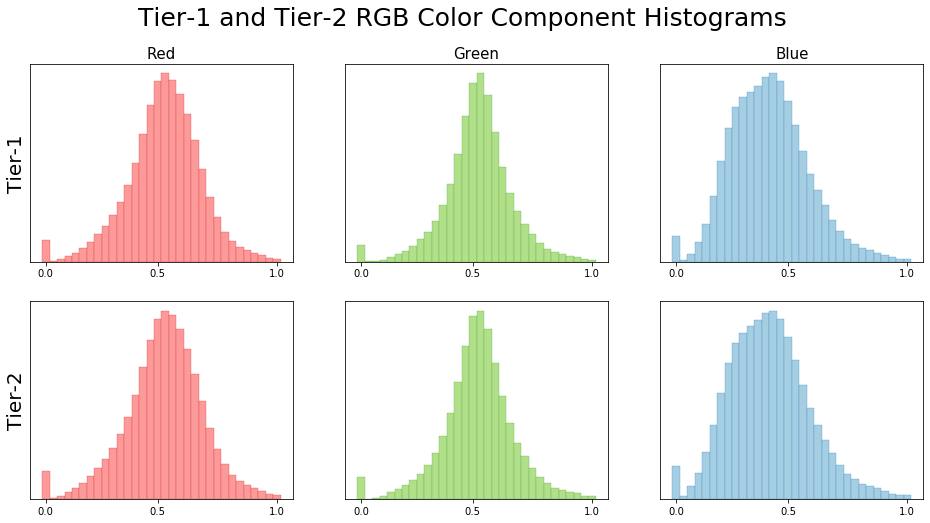

In [10]:
fig, axs = plt.subplots(2,3, figsize=(16,8))
axs[0, 0].set_ylabel('Tier-1', fontsize=20)
axs[0, 0].set_title('Red', fontsize=15)
axs[0, 0].bar(x=range(0,32), height=tier_r_histogram.iloc[0].values, width=1.,
              color='#fb9a99', edgecolor='#e31a1c', linewidth=0.25)
axs[0, 1].set_title('Green', fontsize=15)
axs[0, 1].bar(x=range(0,32), height=tier_g_histogram.iloc[0].values, width=1.,
              color='#b2df8a', edgecolor='#33a02c', linewidth=0.25)
axs[0, 2].set_title('Blue', fontsize=15)
axs[0, 2].bar(x=range(0,32), height=tier_b_histogram.iloc[0].values, width=1.,
              color='#a6cee3', edgecolor='#1f78b4', linewidth=0.25)
axs[1, 0].set_ylabel('Tier-2', fontsize=20)
axs[1, 0].bar(x=range(0,32), height=tier_r_histogram.iloc[1].values, width=1.,
              color='#fb9a99', edgecolor='#e31a1c', linewidth=0.25)
axs[1, 1].bar(x=range(0,32), height=tier_g_histogram.iloc[1].values, width=1.,
              color='#b2df8a', edgecolor='#33a02c', linewidth=0.25)
axs[1, 2].bar(x=range(0,32), height=tier_b_histogram.iloc[1].values, width=1.,
              color='#a6cee3', edgecolor='#1f78b4', linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Tier-1 and Tier-2 RGB Color Component Histograms', fontsize=25)
plt.show()

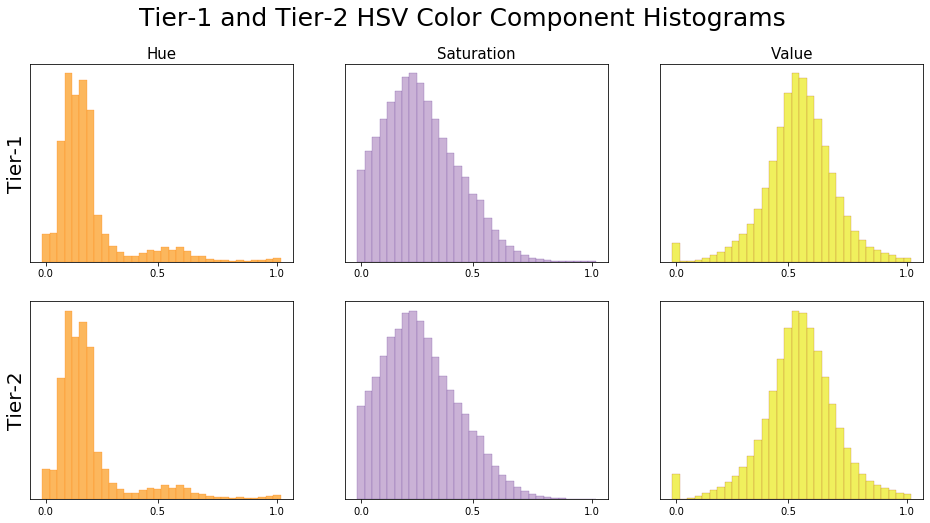

In [11]:
fig, axs = plt.subplots(2,3, figsize=(16,8))
axs[0, 0].set_ylabel('Tier-1', fontsize=20)
axs[0, 0].set_title('Hue', fontsize=15)
axs[0, 0].bar(x=range(0,32), height=tier_h_histogram.iloc[0].values, width=1.,
              color='#fcb75d', edgecolor='#ff7f00', linewidth=0.25)
axs[0, 1].set_title('Saturation', fontsize=15)
axs[0, 1].bar(x=range(0,32), height=tier_s_histogram.iloc[0].values, width=1.,
              color='#cab2d6', edgecolor='#6a3d9a', linewidth=0.25)
axs[0, 2].set_title('Value', fontsize=15)
axs[0, 2].bar(x=range(0,32), height=tier_v_histogram.iloc[0].values, width=1.,
              color='#f0f05d', edgecolor='#b15928', linewidth=0.25)
axs[1, 0].set_ylabel('Tier-2', fontsize=20)
axs[1, 0].bar(x=range(0,32), height=tier_h_histogram.iloc[1].values, width=1.,
              color='#fcb75d', edgecolor='#ff7f00', linewidth=0.25)
axs[1, 1].bar(x=range(0,32), height=tier_s_histogram.iloc[1].values, width=1.,
              color='#cab2d6', edgecolor='#6a3d9a', linewidth=0.25)
axs[1, 2].bar(x=range(0,32), height=tier_v_histogram.iloc[1].values, width=1.,
              color='#f0f05d', edgecolor='#b15928', linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Tier-1 and Tier-2 HSV Color Component Histograms', fontsize=25)
plt.show()

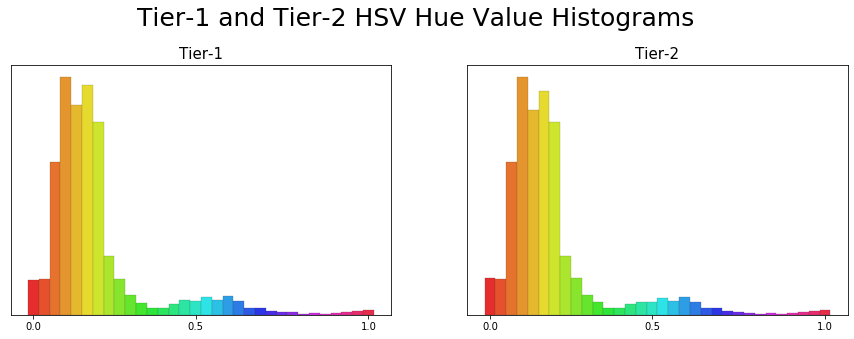

In [12]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].set_title('Tier-1', fontsize=15)
axs[0].bar(x=range(0,32), height=tier_h_histogram.iloc[0].values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
axs[1].set_title('Tier-2', fontsize=15)
axs[1].bar(x=range(0,32), height=tier_h_histogram.iloc[1].values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Tier-1 and Tier-2 HSV Hue Value Histograms', fontsize=25)
plt.subplots_adjust(top=.82)
plt.show()

In [13]:
train_r_histogram = data_summary_df.agg(create_hist_agg('r', 32))
train_g_histogram = data_summary_df.agg(create_hist_agg('g', 32))
train_b_histogram = data_summary_df.agg(create_hist_agg('b', 32))
train_h_histogram = data_summary_df.agg(create_hist_agg('h', 32))
train_s_histogram = data_summary_df.agg(create_hist_agg('s', 32))
train_v_histogram = data_summary_df.agg(create_hist_agg('v', 32))

In [14]:
test_r_histogram = test_data_summary_df.agg(create_hist_agg('r', 32))
test_g_histogram = test_data_summary_df.agg(create_hist_agg('g', 32))
test_b_histogram = test_data_summary_df.agg(create_hist_agg('b', 32))
test_h_histogram = test_data_summary_df.agg(create_hist_agg('h', 32))
test_s_histogram = test_data_summary_df.agg(create_hist_agg('s', 32))
test_v_histogram = test_data_summary_df.agg(create_hist_agg('v', 32))

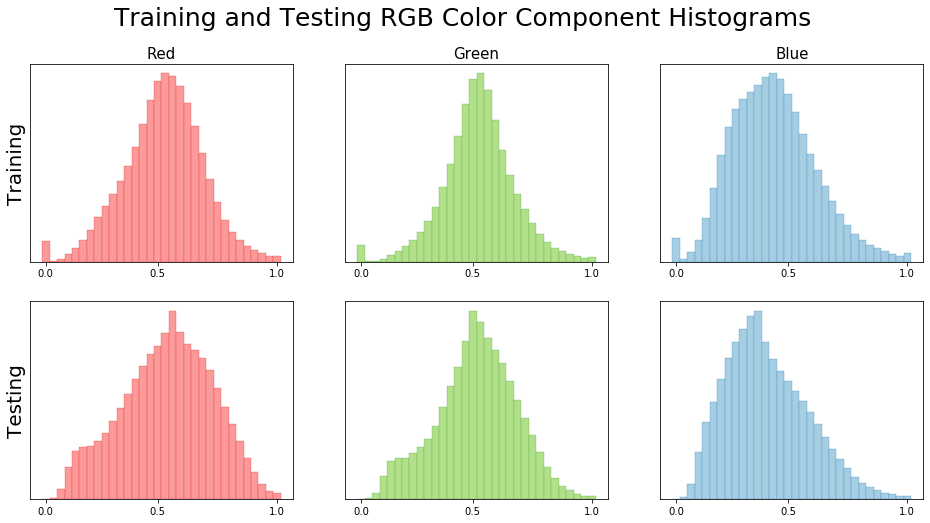

In [15]:
fig, axs = plt.subplots(2,3, figsize=(16,8))
axs[0, 0].set_ylabel('Training', fontsize=20)
axs[0, 0].set_title('Red', fontsize=15)
axs[0, 0].bar(x=range(0,32), height=train_r_histogram.values, width=1.,
              color='#fb9a99', edgecolor='#e31a1c', linewidth=0.25)
axs[0, 1].set_title('Green', fontsize=15)
axs[0, 1].bar(x=range(0,32), height=train_g_histogram.values, width=1.,
              color='#b2df8a', edgecolor='#33a02c', linewidth=0.25)
axs[0, 2].set_title('Blue', fontsize=15)
axs[0, 2].bar(x=range(0,32), height=train_b_histogram.values, width=1.,
              color='#a6cee3', edgecolor='#1f78b4', linewidth=0.25)
axs[1, 0].set_ylabel('Testing', fontsize=20)
axs[1, 0].bar(x=range(0,32), height=test_r_histogram.values, width=1.,
              color='#fb9a99', edgecolor='#e31a1c', linewidth=0.25)
axs[1, 1].bar(x=range(0,32), height=test_g_histogram.values, width=1.,
              color='#b2df8a', edgecolor='#33a02c', linewidth=0.25)
axs[1, 2].bar(x=range(0,32), height=test_b_histogram.values, width=1.,
              color='#a6cee3', edgecolor='#1f78b4', linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Training and Testing RGB Color Component Histograms', fontsize=25)
plt.show()

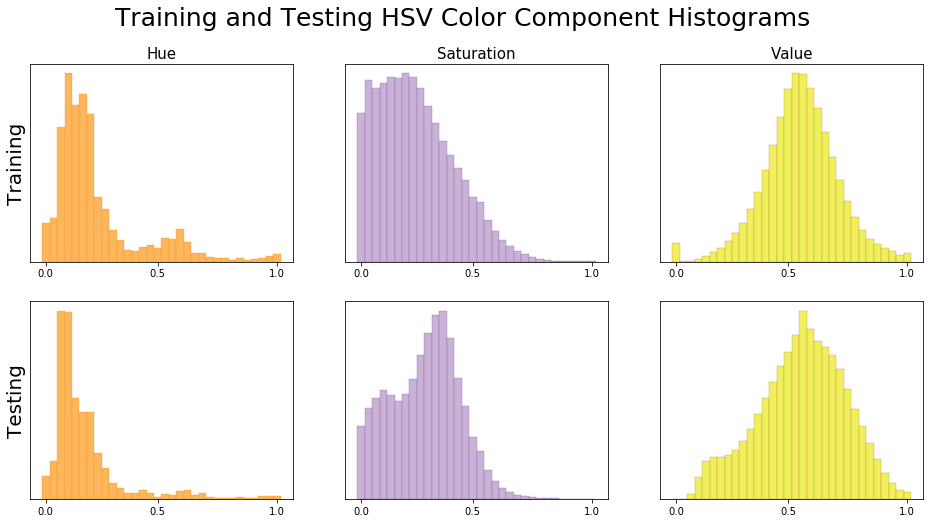

In [16]:
fig, axs = plt.subplots(2,3, figsize=(16,8))
axs[0, 0].set_ylabel('Training', fontsize=20)
axs[0, 0].set_title('Hue', fontsize=15)
axs[0, 0].bar(x=range(0,32), height=train_h_histogram.values, width=1.,
              color='#fcb75d', edgecolor='#ff7f00', linewidth=0.25)
axs[0, 1].set_title('Saturation', fontsize=15)
axs[0, 1].bar(x=range(0,32), height=train_s_histogram.values, width=1.,
              color='#cab2d6', edgecolor='#6a3d9a', linewidth=0.25)
axs[0, 2].set_title('Value', fontsize=15)
axs[0, 2].bar(x=range(0,32), height=train_v_histogram.values, width=1.,
              color='#f0f05d', edgecolor='#b15928', linewidth=0.25)
axs[1, 0].set_ylabel('Testing', fontsize=20)
axs[1, 0].bar(x=range(0,32), height=test_h_histogram.values, width=1.,
              color='#fcb75d', edgecolor='#ff7f00', linewidth=0.25)
axs[1, 1].bar(x=range(0,32), height=test_s_histogram.values, width=1.,
              color='#cab2d6', edgecolor='#6a3d9a', linewidth=0.25)
axs[1, 2].bar(x=range(0,32), height=test_v_histogram.values, width=1.,
              color='#f0f05d', edgecolor='#b15928', linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Training and Testing HSV Color Component Histograms', fontsize=25)
plt.show()

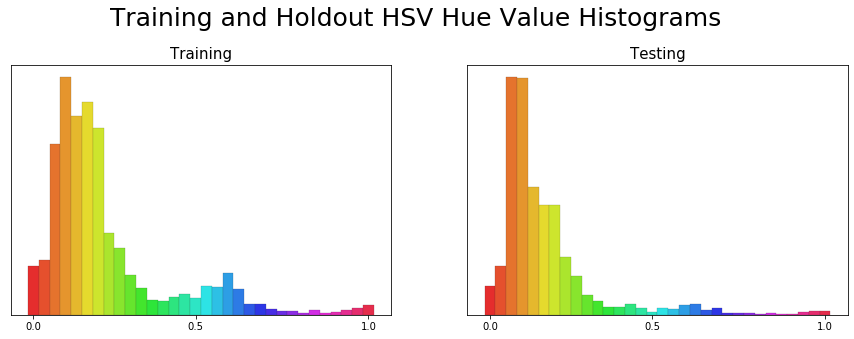

In [20]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].set_title('Training', fontsize=15)
axs[0].bar(x=range(0,32), height=train_h_histogram.values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
axs[1].set_title('Testing', fontsize=15)
axs[1].bar(x=range(0,32), height=test_h_histogram.values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Training and Holdout HSV Hue Value Histograms', fontsize=25)
plt.subplots_adjust(top=.82)
plt.show()

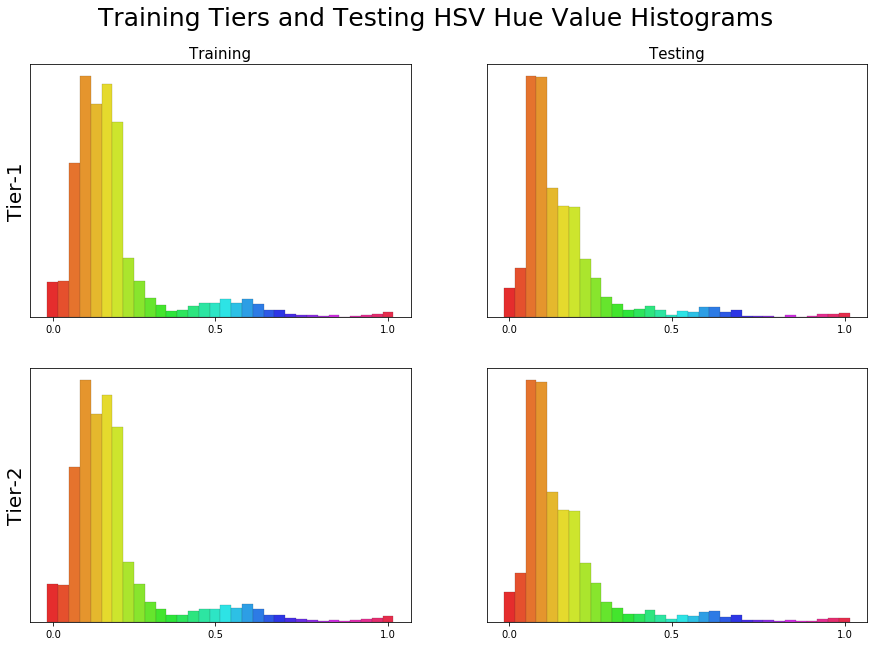

In [18]:
fig, axs = plt.subplots(2,2, figsize=(15,10))
axs[0, 0].set_title('Training', fontsize=15)
axs[0, 0].set_ylabel('Tier-1', fontsize=20)
axs[0, 0].bar(x=range(0,32), height=tier_h_histogram.iloc[0].values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
axs[0, 1].set_title('Testing', fontsize=15)
axs[0, 1].bar(x=range(0,32), height=test_h_histogram.values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
axs[1, 0].set_ylabel('Tier-2', fontsize=20)
axs[1, 0].bar(x=range(0,32), height=tier_h_histogram.iloc[1].values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
axs[1, 1].bar(x=range(0,32), height=test_h_histogram.values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Training Tiers and Testing HSV Hue Value Histograms', fontsize=25)
plt.subplots_adjust(top=.90)
plt.show()